<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [2]:
df_train=pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_train_clear=df_train.fillna(value=None, method="ffill") 
df_train_clear
print(df_train_clear.isna().sum()*100/len(df_train))

date                                          0.0
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 87, dtype: float64


In [3]:
df_test=pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_test=df_test.fillna(value=None, method="ffill") 
df_test
#print(df_test.isnull().sum()*100/len(df_test))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [4]:
df_full=pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_full=df_full.fillna(value=None, method="ffill") 
df_full
#print(df_full.isnull().sum()*100/len(df_full))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Данные выгружены и их много

In [5]:
df_traincs=df_train.columns
df_testcs=df_test.columns
df_diff=[]
for train in df_traincs:
    if train not in df_testcs:
        df_diff.append(train)
print(len(df_traincs))
df_diff

87


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В тестовой выборке по сути отсутствуют все выходные параметры с каждого этапа, чтоб мы предсказали так предсказали

In [6]:
df_train_clear1=df_train
df_train_clear1=df_train.dropna()

In [7]:
F=df_train_clear1['rougher.input.feed_au']
print(F.isna().value_counts())
C=df_train_clear1['rougher.output.concentrate_au']
print(C.isna().value_counts())
T=df_train_clear1['rougher.output.tail_au']
print(T.isna().value_counts())
A=C*(F-T)
print(A.isna().value_counts())
B=F*(C-T)
print(B.isna().value_counts())
df_train_clear1['rougher_recovery']=(A/B)*100
print(df_train_clear1['rougher_recovery'].isna().value_counts())
print(mean_absolute_error(df_train_clear1['rougher.output.recovery'], df_train_clear1['rougher_recovery']))

False    11017
Name: rougher.input.feed_au, dtype: int64
False    11017
Name: rougher.output.concentrate_au, dtype: int64
False    11017
Name: rougher.output.tail_au, dtype: int64
False    11017
dtype: int64
False    11017
dtype: int64
False    11017
Name: rougher_recovery, dtype: int64
9.739730529255835e-15


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Полученная ошибка порядка минус 15 степени, думаю вполне себе не критично. Были косяки тк данные заполнялись ффилом, иногда появлялись нули при расчете MAE, поэтому длины векторов чуть короче базовых

## Анализ данных

In [8]:
print("------------------------------------------------------")
print("Средняя концентрация свинца после флотации", df_full["rougher.output.concentrate_pb"].mean())
print("Средняя концентрация свинца после первичного этапа очистки", df_full['primary_cleaner.output.concentrate_pb'].mean())
print("Средняя концентрация свинца на выходе", df_full["final.output.concentrate_pb"].mean())
print("------------------------------------------------------")
print("Средняя концентрация серебра после флотации", df_full["rougher.output.concentrate_ag"].mean())
print("Средняя концентрация серебра после первичного этапа очистки", df_full['primary_cleaner.output.concentrate_ag'].mean())
print("Средняя концентрация серебра на выходе", df_full["final.output.concentrate_ag"].mean())
print("------------------------------------------------------")
print("Средняя концентрация золота после флотации", df_full["rougher.output.concentrate_au"].mean())
print("Средняя концентрация золота после первичного этапа очистки", df_full['primary_cleaner.output.concentrate_au'].mean())
print("Средняя концентрация золота на выходе", df_full["final.output.concentrate_au"].mean())

------------------------------------------------------
Средняя концентрация свинца после флотации 7.606272313195004
Средняя концентрация свинца после первичного этапа очистки 9.810316539310149
Средняя концентрация свинца на выходе 9.978821384192907
------------------------------------------------------
Средняя концентрация серебра после флотации 11.994759359873429
Средняя концентрация серебра после первичного этапа очистки 8.44240807771906
Средняя концентрация серебра на выходе 5.168386967510243
------------------------------------------------------
Средняя концентрация золота после флотации 19.772000139486313
Средняя концентрация золота после первичного этапа очистки 32.1194004078765
Средняя концентрация золота на выходе 44.0765129419528


Концентрации свинца и золота в процессе очистки закномерн растут, а вот серебра все меньше и меньше. Думаю все же тк мы целим больше в золото здесь, то и специфику очистки серебра особо в процессе никто не учитывает (можно было все в функцию преобразовать, но мне просто более конкретная графика тут нравится аля серебра и тд а не серебро и ее параметры) 

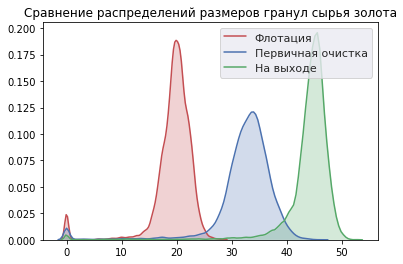

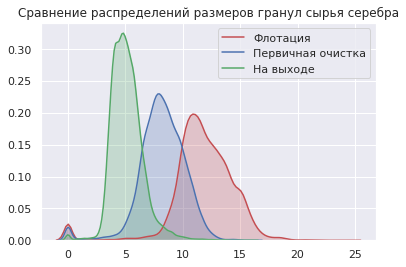

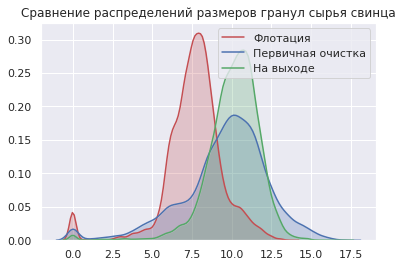

In [9]:
plt.title("Сравнение распределений размеров гранул сырья золота")
sns.set(style="darkgrid")
fig = sns.kdeplot(df_train["rougher.output.concentrate_au"], shade=True, color="r")
fig = sns.kdeplot(df_train["primary_cleaner.output.concentrate_au"], shade=True, color="b")
fig = sns.kdeplot(df_train["final.output.concentrate_au"], shade=True, color="g")
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)
plt.show()

plt.title("Сравнение распределений размеров гранул сырья серебра")
sns.set(style="darkgrid")
fig = sns.kdeplot(df_train["rougher.output.concentrate_ag"], shade=True, color="r")
fig = sns.kdeplot(df_train["primary_cleaner.output.concentrate_ag"], shade=True, color="b")
fig = sns.kdeplot(df_train["final.output.concentrate_ag"], shade=True, color="g")
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)
plt.show()

plt.title("Сравнение распределений размеров гранул сырья свинца")
sns.set(style="darkgrid")
fig = sns.kdeplot(df_train["rougher.output.concentrate_pb"], shade=True, color="r")
fig = sns.kdeplot(df_train["primary_cleaner.output.concentrate_pb"], shade=True, color="b")
fig = sns.kdeplot(df_train["final.output.concentrate_pb"], shade=True, color="g")
plt.legend(['Флотация', 'Первичная очистка', "На выходе" ], loc=1)
plt.show()

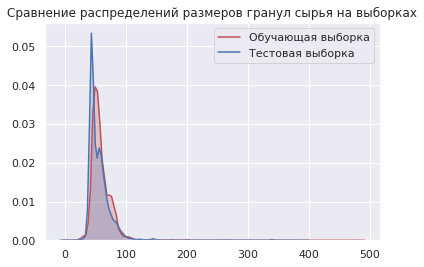

In [10]:
plt.title("Сравнение распределений размеров гранул сырья на выборках")
sns.set(style="darkgrid")
fig = sns.kdeplot(df_train['rougher.input.feed_size'], shade=True, color="r")
fig = sns.kdeplot(df_test['rougher.input.feed_size'], shade=True, color="b")
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc=1)
plt.show()

Графически распределения размеров гранул очень похожи, думаю ошибки не должно быть

In [11]:
df_train_clear1['input']=df_train_clear1['rougher.input.feed_ag']+df_train_clear1['rougher.input.feed_pb']+df_train_clear1['rougher.input.feed_au']+df_train_clear1['rougher.input.feed_sol']
df_train_clear1['rougher']=df_train_clear1['rougher.output.concentrate_ag']+df_train_clear1['rougher.output.concentrate_pb']+df_train_clear1['rougher.output.concentrate_au']+df_train_clear1['rougher.output.concentrate_sol']

df_train_clear1['black']=df_train_clear1['primary_cleaner.output.concentrate_ag']+df_train_clear1['primary_cleaner.output.concentrate_pb']+df_train_clear1['primary_cleaner.output.concentrate_au']+df_train_clear1['primary_cleaner.output.concentrate_sol']

df_train_clear1['finale']=df_train_clear1['final.output.concentrate_ag']+df_train_clear1['final.output.concentrate_pb']+df_train_clear1['final.output.concentrate_au']+df_train_clear1['final.output.concentrate_sol']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Если смотреть по всей выборке, то на этапе работы с черновым концентратом вещества маловато, но думаю просто этот нюанс связан за типом заполнения пропусков

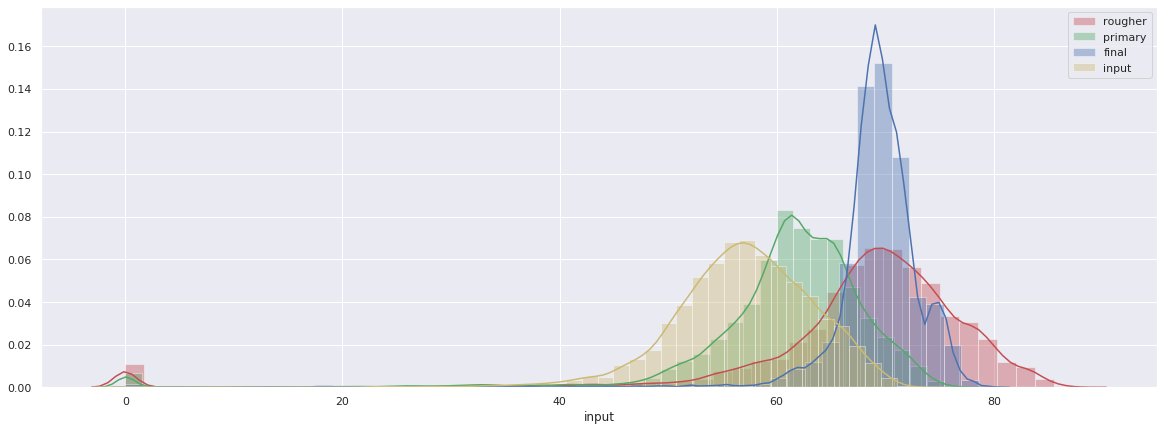

In [12]:
fig = plt.subplots(figsize=(20, 7))
fig = sns.distplot(a=df_train_clear1['rougher'], hist=True, kde=True, rug=False , color="r")
fig = sns.distplot(a=df_train_clear1['black'], hist=True, kde=True, rug=False , color="g")
fig = sns.distplot(a=df_train_clear1['finale'], hist=True, kde=True, rug=False , color="b")
fig = sns.distplot(a=df_train_clear1['input'], hist=True, kde=True, rug=False , color="y")
plt.legend(['rougher', 'primary', 'final', 'input'], loc=1)
plt.show()

In [13]:
df_train_clear1=df_train_clear1.query('rougher > 20 & black>20 & finale>20 & input >20')
print(df_train_clear1.shape)
df_train_clear1['final_recovery']=df_train_clear1['final.output.recovery']
df_train_clear1=df_train_clear1.query('50 < final_recovery < 95')
df_train_clear1.shape

(10611, 92)


(10226, 93)

count    10226.000000
mean        67.685330
std          6.441740
min         50.067542
25%         63.567966
50%         67.565718
75%         72.169023
max         93.670199
Name: final.output.recovery, dtype: float64

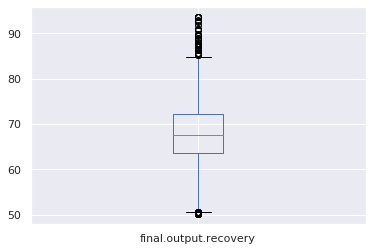

In [14]:
df_train_clear1.boxplot('final.output.recovery')
df_train_clear1['final.output.recovery'].describe()

## Модель

In [15]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

Написал формулу для smape

In [16]:
train_target1=df_train_clear1['rougher.output.recovery']
train_target2=df_train_clear1['final_recovery']
train_features=df_train_clear1[df_test.columns].drop('date', axis=1)
train_features.shape

(10226, 52)

In [17]:
df_full_target=df_full[['date','rougher.output.recovery','final.output.recovery']]
df_test_ready = df_test.merge(df_full_target,  on='date', how='left')
df_test_ready=df_test_ready.dropna()

In [18]:
test_features=df_test_ready.drop(['date','rougher.output.recovery', 'final.output.recovery'], axis=1)
print(test_features.shape)
test_target1=df_test_ready['rougher.output.recovery']
test_target2=df_test_ready['final.output.recovery']

(5290, 52)


здесь разбил данные на фичи и таргеты, таргеты для тестовой выборки взял из общего набора данных

In [19]:
model_lr =LinearRegression() 
model_lr.fit(train_features, train_target1)
result=model_lr.predict(test_features)
smape1=smape(test_target1, result) 
print(smape1)

8.607609571751693


In [20]:
model_lr1 =LinearRegression() 
model_lr1.fit(train_features, train_target2)
result1=model_lr.predict(test_features)
smape1=smape(test_target2, result1) 
print(smape1)

22.878856841428075


Был произведен подбор гиперпараметров, по результатам которого стало понятно, что хоть и придется ждать полчаса, но случайный лес - точнее остальных по обеим метрикам

In [21]:
model_rougher=RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=1)
model_rougher.fit(train_features, train_target1) 
result=model_rougher.predict(test_features)
smape_rougher=smape(test_target1, result)
scores_rougher = cross_val_score(model_rougher, test_features, result, cv=5)
final_score = scores_rougher.mean()
print(smape_rougher)
print(scores_rougher)

8.055571292520616
[-0.41073151  0.79697618  0.77923351  0.35670086  0.40343821]


In [22]:
model_final=LinearRegression(copy_X=True, normalize = True)
model_final.fit(train_features, train_target2) 
result1=model_final.predict(test_features)
smape_final=smape(test_target2, result1)
scores_final = cross_val_score(model_final, test_features, result1, cv=5)
final_score1 = scores_final.mean()
print(smape_final)

9.141959024992607


In [23]:
model_final1=RandomForestRegressor(random_state=12345, n_estimators=40, max_depth=7)
model_final1.fit(train_features, train_target2) 
result=model_final1.predict(test_features)
smape_final1=smape(test_target2, result)
scores_final = cross_val_score(model_final1, test_features, result, cv=5)
final_score1 = scores_final.mean()
print(smape_final1)
print(final_score1)

9.060810868578608
0.814041632550208


In [24]:
model_final2=RandomForestRegressor(random_state=12345, max_depth=1)
model_final2.fit(train_features, train_target2) 
result=model_final2.predict(test_features)
smape_final2=smape(test_target2, result)
scores_final = cross_val_score(model_final2, test_features, result, cv=5)
final_score1 = scores_final.mean()
print(smape_final2)
print(final_score1)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


9.386544804136319
0.9701410114661652


Но в процессе проверки статистики оказалось, что для финальных параметров сырья линейная регрессия лучше (smape меньше). Ну а так по результатам кросс-валидации результаты неплохие, только смущает, что четвертый набор отвратительно предсказан, там скорее всего выброс был или вроде того (но точность моделей на выходных данных меня пугает мягко говоря, думаю где-то ошибся).

In [25]:
total_smape=0.25*smape_rougher+0.75*smape_final1
print('Итоговое симметричное среднее абсолютное процентное отклонение', total_smape)

Итоговое симметричное среднее абсолютное процентное отклонение 8.809500974564111


In [26]:
from sklearn.dummy import DummyRegressor
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(train_features, train_target2)
dummy_rougher_pred = dummy_regressor_rougher.predict(test_features)
smape_dummy_rougher = smape(test_target2, dummy_rougher_pred)
print(smape_dummy_rougher)

dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(train_features, train_target1)
dummy_final_pred = dummy_regressor_final.predict(test_features)
smape_dummy_final = smape(test_target1, dummy_final_pred)
print(smape_dummy_final)

total_smape=0.25*smape_dummy_rougher+0.75*smape_dummy_final
total_smape

9.70284727672549
8.670264849521997


8.92841045632287

Итоговый smape относительно небольшой, думаю в процессе уже непосредственно после подбора гиперпараметров я где-то норм накосячил либо же еще и выбросы стоило найти и убрать (плотбар строился полчаса я сдался)

In [27]:
from sklearn.metrics import make_scorer
scores = make_scorer(smape, greater_is_better = False)

In [28]:
# Линейная регрессия
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def lr_gridsearchcv(features, target, scores):
    model = LinearRegression()
    param_grid = {
        'copy_X':[True, False],
        'fit_intercept' : [True, False],
        'normalize':[True,False]
    }
    
    my_scorer = make_scorer(scores, greater_is_better=False)
    CV = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, scoring = my_scorer)
    CV.fit(features, target)
    print('Лучшее значение метрики: {:.2f}'.format(-CV.best_score_))
    print('Лучшие гиперпараметры: ', CV.best_params_)
    return CV.best_params_ 

lr_gridsearchcv(train_features, train_target1, smape)
lr_gridsearchcv(train_features, train_target2, smape)
#Пытался вызвать, но чет не пошло

Лучшее значение метрики: 5.70
Лучшие гиперпараметры:  {'copy_X': True, 'fit_intercept': True, 'normalize': True}
Лучшее значение метрики: 7.28
Лучшие гиперпараметры:  {'copy_X': True, 'fit_intercept': False, 'normalize': True}


{'copy_X': True, 'fit_intercept': False, 'normalize': True}

В конец проекта вывел подбор оптимальных для данной метрики гиперпараметров для логистической регрессии а также сгенерил дамми реггресор, чтобы было, с чем сравнить.